In [1]:
import os
import sys
import inspect

# Insert modules directory, TODO create setup.py file
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
reports_dir = os.path.dirname(currentdir)
project_home_dir = os.path.dirname(reports_dir)
sys.path.insert(0, f"{project_home_dir}/qcnn")

In [2]:
import numpy as np
import pandas as pd
import os
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd

from IPython.display import Image
from sklearn.metrics import confusion_matrix
from reporting_functions import (
    confusion_matrix_stats,
    plot_confusion_matrix_nn,
    get_tp_tn_lists,
    plot_loss,
    get_result_table,
    gather_experiment_results,
    gather_results_deprecated,
    get_file_content,
    get_result_table_target_pairs,
    get_multiclass_results,
)

from circuit_presets import (
    CIRCUIT_OPTIONS,
    POOLING_OPTIONS,
)
from preprocessing import filter_embedding_options, EMBEDDING_OPTIONS

# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [3]:
experiments_path = f"{project_home_dir}/experiments"
experiment_filename = "experiment_config.json"  # "experiment.txt"
experiment_time = "experiment_time.json"

In [4]:
experiment_id = 103  # 54 # 61 # 64
experiment_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_filename}"
)
experiment_time_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_time}"
)
result_data = gather_experiment_results(f"{experiments_path}/{experiment_id}")

In [5]:
experiment_info

{'ID': 103,
 'path': '../experiments',
 'data': {'target_pairs': [['blues', 'classical'],
   ['blues', 'country'],
   ['blues', 'disco'],
   ['blues', 'hiphop'],
   ['blues', 'jazz'],
   ['blues', 'metal'],
   ['blues', 'pop'],
   ['blues', 'reggae'],
   ['blues', 'rock'],
   ['classical', 'country'],
   ['classical', 'disco'],
   ['classical', 'hiphop'],
   ['classical', 'jazz'],
   ['classical', 'metal'],
   ['classical', 'pop'],
   ['classical', 'reggae'],
   ['classical', 'rock'],
   ['country', 'disco'],
   ['country', 'hiphop'],
   ['country', 'jazz'],
   ['country', 'metal'],
   ['country', 'pop'],
   ['country', 'reggae'],
   ['country', 'rock'],
   ['disco', 'hiphop'],
   ['disco', 'jazz'],
   ['disco', 'metal'],
   ['disco', 'pop'],
   ['disco', 'reggae'],
   ['disco', 'rock'],
   ['hiphop', 'jazz'],
   ['hiphop', 'metal'],
   ['hiphop', 'pop'],
   ['hiphop', 'reggae'],
   ['hiphop', 'rock'],
   ['jazz', 'metal'],
   ['jazz', 'pop'],
   ['jazz', 'reggae'],
   ['jazz', 'rock']

In [6]:
experiment_time_info

{'pca-8-quantum-Angle-U_5-blues-classical': 2414.0519711971283,
 'pca-8-quantum-Angle-U_5-blues-country': 2581.554418563843,
 'pca-8-quantum-Angle-U_5-blues-disco': 2708.53852725029,
 'pca-8-quantum-Angle-U_5-blues-hiphop': 2285.260772228241,
 'pca-8-quantum-Angle-U_5-blues-jazz': 2096.027909755707,
 'pca-8-quantum-Angle-U_5-blues-metal': 2361.4557917118073,
 'pca-8-quantum-Angle-U_5-blues-pop': 2795.8108682632446,
 'pca-8-quantum-Angle-U_5-blues-reggae': 2104.5757575035095,
 'pca-8-quantum-Angle-U_5-blues-rock': 1869.004774570465,
 'pca-8-quantum-Angle-U_5-classical-country': 1721.0332896709442,
 'pca-8-quantum-Angle-U_5-classical-disco': 1685.7629916667938,
 'pca-8-quantum-Angle-U_5-classical-hiphop': 1338.9570887088776,
 'pca-8-quantum-Angle-U_5-classical-jazz': 1299.2846930027008,
 'pca-8-quantum-Angle-U_5-classical-metal': 1303.6198494434357,
 'pca-8-quantum-Angle-U_5-classical-pop': 1314.0843527317047,
 'pca-8-quantum-Angle-U_5-classical-reggae': 1304.5023670196533,
 'pca-8-quant

In [7]:
result_data.head()

model circuit  circuit_param_count reduction_method  reduction_size embedding_option embedding_class  embedding_permutation  target_levels_list    target_levels  accuracy  precision  recall     f1                                 loss_train_history                                  loss_test_history                                              y_hat                                             y_test
0  pca-8-quantum-IQP-U_5-blues-classical     U_5                 10.0              pca             8.0              IQP             IQP                    1.0  [blues, classical]  blues-classical     0.745      0.674   1.000  0.806  0      19.639
1      24.737
2      17.401
3   ...  0      16.108
1      18.916
2      17.519
3   ...  0     1
1     0
2     0
3     0
4     1
     ....  0     1
1     0
2     1
3     1
4     1
     ....
1    pca-8-quantum-IQP-U_5-blues-country     U_5                 10.0              pca             8.0              IQP             IQP                    1.0    [blues, country]    blues-country     0.783      0.784   0.853  0.817  0      19.162
1      18.381
2      16.504
3   ...  0      17.570
1      18.168
2      17.076
3   ...  0     0
1     0
2     0
3     1
4     0
     ....  0     1
1     1
2     1
3     1
4     0
     ....
2      pca-8-quantum-IQP-U_5-blues-disco     U_5                 10.0              pca             8.0              IQP             IQP                    1.0      [blues, disco]      blues-disco     0.717      0.688   0.815  0.746  0      19.229
1      17.131
2      20.710
3   ...  0      16.921
1      16.954
2      16.239
3   ...  0     0
1     0
2     0
3     0
4     0
     ....  0     0
1     1
2     1
3     0
4     0
     ....
3     pca-8-quantum-IQP-U_5-blues-hiphop     U_5                 10.0              pca             8.0              IQP             IQP                    1.0     [blues, hiphop]     blues-hiphop     0.750      0.864   0.633  0.731  0      16.789
1      16.766
2      18.459
3   ...  0      18.175
1      18.532
2      17.821
3   ...  0     0
1     0
2     0
3     0
4     0
     ....  0     0
1     0
2     0
3     0
4     0
     ....
4       pca-8-quantum-IQP-U_5-blues-jazz     U_5                 10.0              pca             8.0              IQP             IQP                    1.0       [blues, jazz]       blues-jazz     0.889      0.867   0.929  0.897  0      24.342
1      16.777
2      16.617
3   ...  0      18.616
1      17.959
2      17.445
3   ...  0     0
1     0
2     0
3     1
4     0
     ....  0     0
1     0
2     0
3     1
4     0
     ....

In [8]:
result_data.shape

(90, 18)

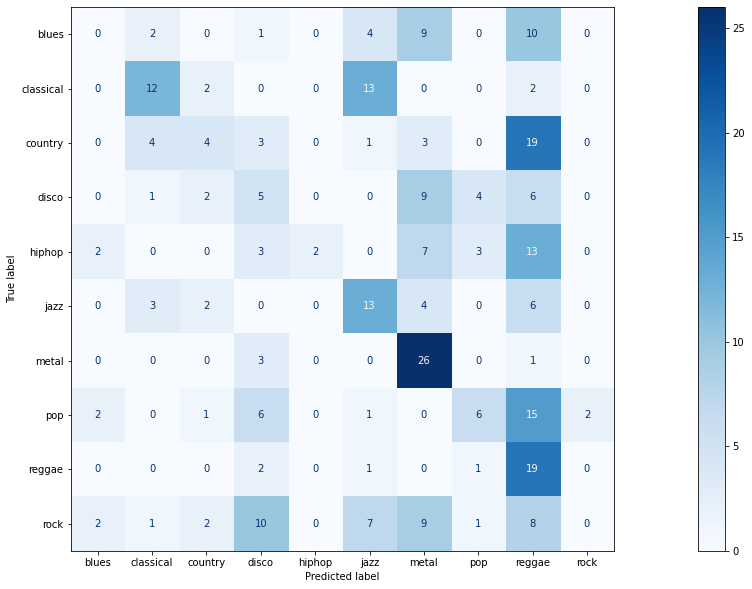

In [9]:
confusion_table, confusion_metrics = get_multiclass_results(
    experiments_path, experiment_info, "pca-8-quantum-IQP-U_5"
)

In [10]:
print(confusion_metrics)

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        26
   classical       0.52      0.41      0.46        29
     country       0.31      0.12      0.17        34
       disco       0.15      0.19      0.17        27
      hiphop       1.00      0.07      0.12        30
        jazz       0.33      0.46      0.38        28
       metal       0.39      0.87      0.54        30
         pop       0.40      0.18      0.25        33
      reggae       0.19      0.83      0.31        23
        rock       0.00      0.00      0.00        40

    accuracy                           0.29       300
   macro avg       0.33      0.31      0.24       300
weighted avg       0.33      0.29      0.23       300



In [ ]:
get_result_table_target_pairs(result_data, "circuit", "target_levels", "accuracy")

rock country  metal reggae hiphop   jazz  blues classical    pop  disco  Average
rock         NaN   0.757  0.786  0.857  0.786   0.75  0.773     0.899   0.89  0.701    0.800
country    0.757     NaN  0.891  0.719  0.828  0.871  0.783     0.937   0.91  0.787    0.831
metal      0.786   0.891    NaN  0.981  0.767  0.966  0.768       1.0  0.984  0.789    0.881
reggae     0.857   0.719  0.981    NaN  0.792  0.863  0.796     0.962  0.857   0.84    0.852
hiphop     0.786   0.828  0.767  0.792    NaN  0.948  0.786       1.0  0.825  0.719    0.828
jazz        0.75   0.871  0.966  0.863  0.948    NaN  0.889     0.789  0.967  0.855    0.878
blues      0.773   0.783  0.768  0.796  0.786  0.889    NaN     0.909  0.983  0.811    0.833
classical  0.899   0.937    1.0  0.962    1.0  0.789  0.909       NaN  0.984  0.964    0.938
pop         0.89    0.91  0.984  0.857  0.825  0.967  0.983     0.984    NaN  0.883    0.921
disco      0.701   0.787  0.789   0.84  0.719  0.855  0.811     0.964  0.883    NaN    0.817
Average      0.8   0.831  0.881  0.852  0.828  0.878  0.833     0.938  0.921  0.817    0.858

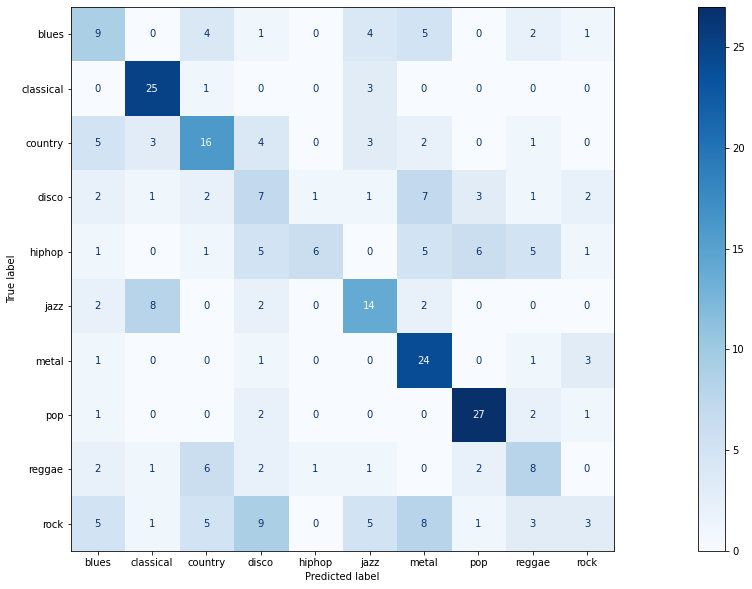

In [ ]:
confusion_table, confusion_metrics = get_multiclass_results(
    experiments_path, experiment_info, "pca-8-quantum-Angle-U_5"
)

In [ ]:
print(confusion_metrics)

              precision    recall  f1-score   support

       blues       0.32      0.35      0.33        26
   classical       0.64      0.86      0.74        29
     country       0.46      0.47      0.46        34
       disco       0.21      0.26      0.23        27
      hiphop       0.75      0.20      0.32        30
        jazz       0.45      0.50      0.47        28
       metal       0.45      0.80      0.58        30
         pop       0.69      0.82      0.75        33
      reggae       0.35      0.35      0.35        23
        rock       0.27      0.07      0.12        40

    accuracy                           0.46       300
   macro avg       0.46      0.47      0.43       300
weighted avg       0.46      0.46      0.43       300



In [ ]:
get_result_table_target_pairs(result_data, "circuit", "target_levels", "accuracy")

rock country  metal reggae hiphop   jazz  blues classical    pop  disco  Average
rock         NaN   0.757  0.786  0.857  0.786   0.75  0.773     0.899   0.89  0.701    0.800
country    0.757     NaN  0.891  0.719  0.828  0.871  0.783     0.937   0.91  0.787    0.831
metal      0.786   0.891    NaN  0.981  0.767  0.966  0.768       1.0  0.984  0.789    0.881
reggae     0.857   0.719  0.981    NaN  0.792  0.863  0.796     0.962  0.857   0.84    0.852
hiphop     0.786   0.828  0.767  0.792    NaN  0.948  0.786       1.0  0.825  0.719    0.828
jazz        0.75   0.871  0.966  0.863  0.948    NaN  0.889     0.789  0.967  0.855    0.878
blues      0.773   0.783  0.768  0.796  0.786  0.889    NaN     0.909  0.983  0.811    0.833
classical  0.899   0.937    1.0  0.962    1.0  0.789  0.909       NaN  0.984  0.964    0.938
pop         0.89    0.91  0.984  0.857  0.825  0.967  0.983     0.984    NaN  0.883    0.921
disco      0.701   0.787  0.789   0.84  0.719  0.855  0.811     0.964  0.883    NaN    0.817
Average      0.8   0.831  0.881  0.852  0.828  0.878  0.833     0.938  0.921  0.817    0.858

In [25]:
result_data["embedding_option"]

0       IQP
1       IQP
2       IQP
3       IQP
4       IQP
      ...  
85    Angle
86    Angle
87    Angle
88    Angle
89    Angle
Name: embedding_option, Length: 90, dtype: object

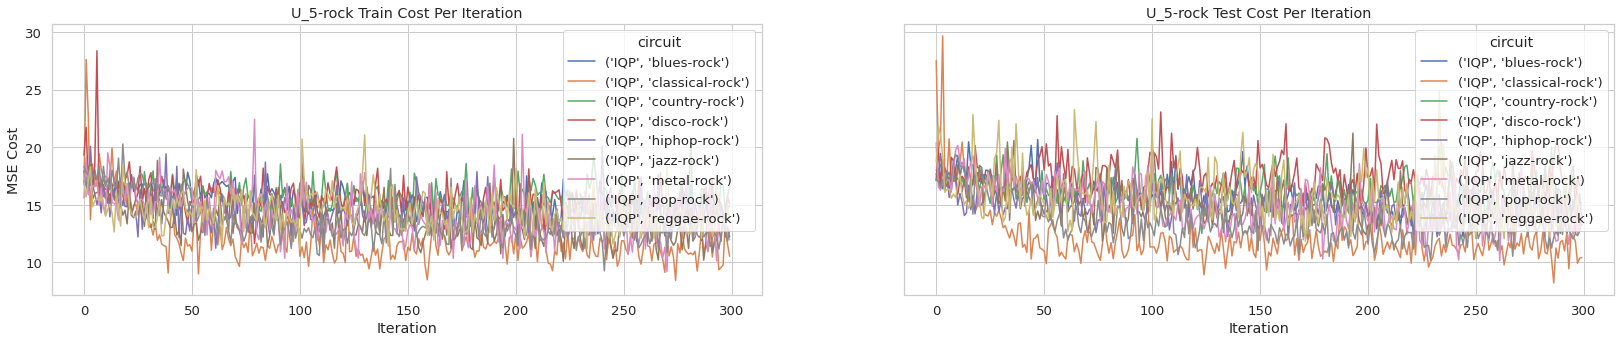

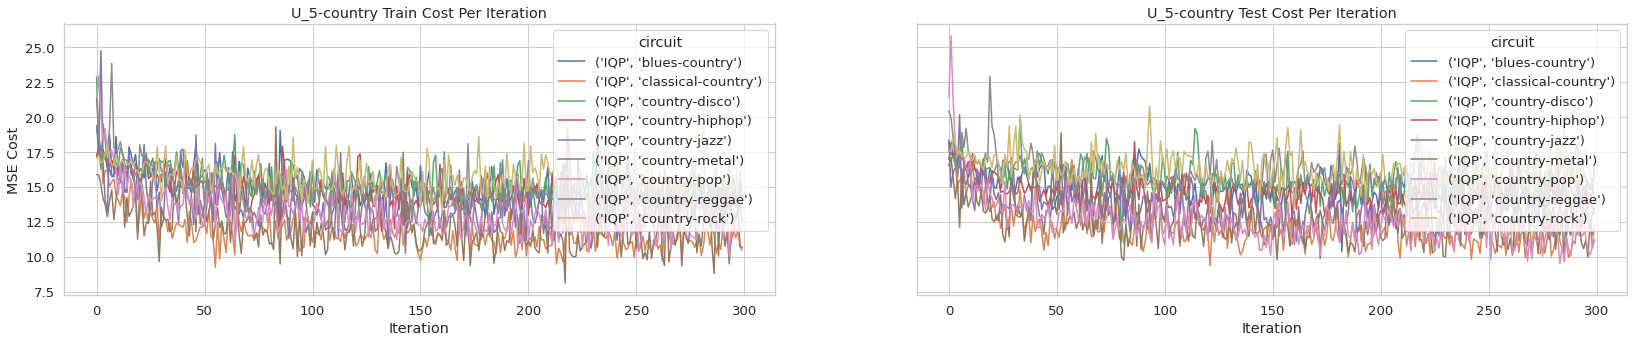

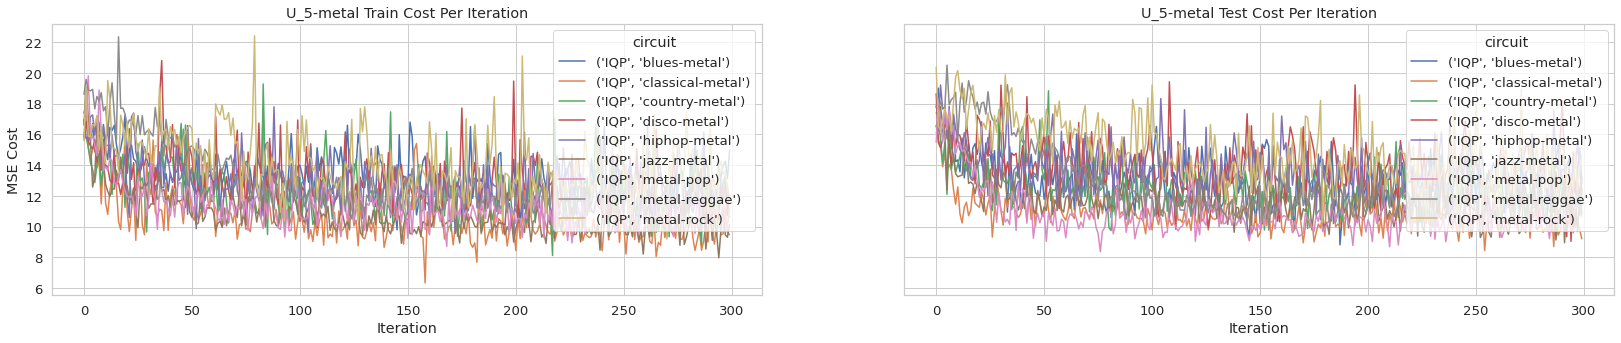

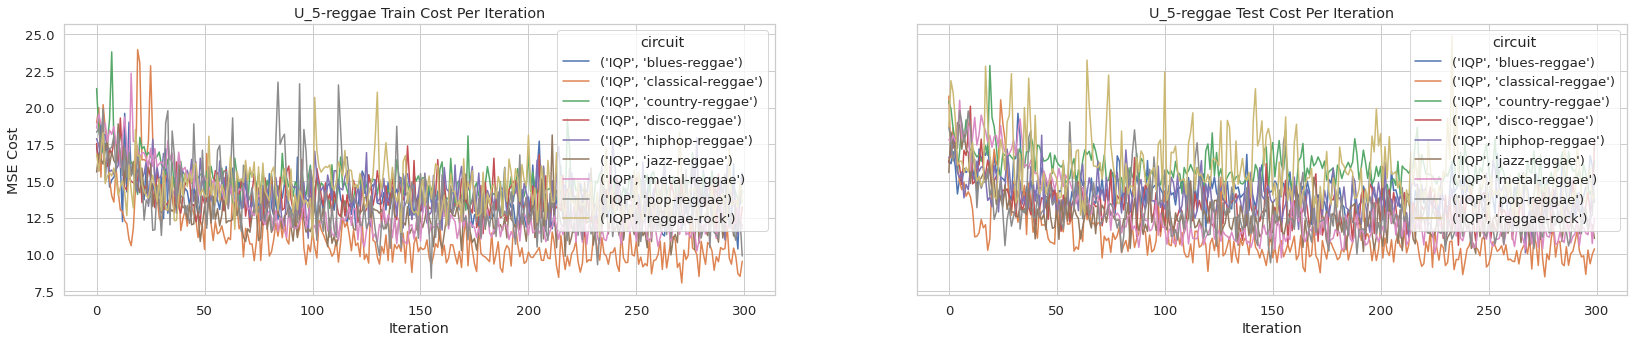

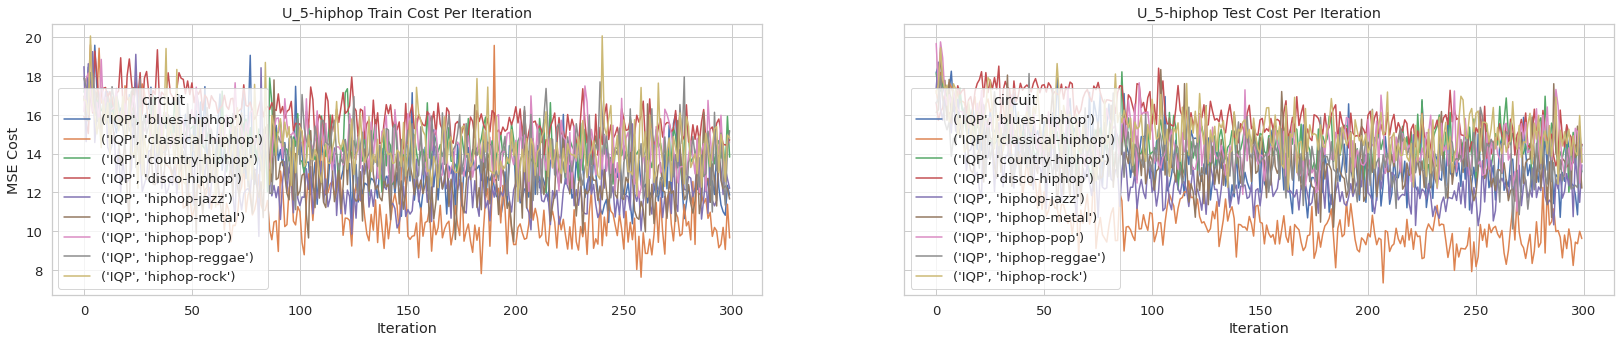

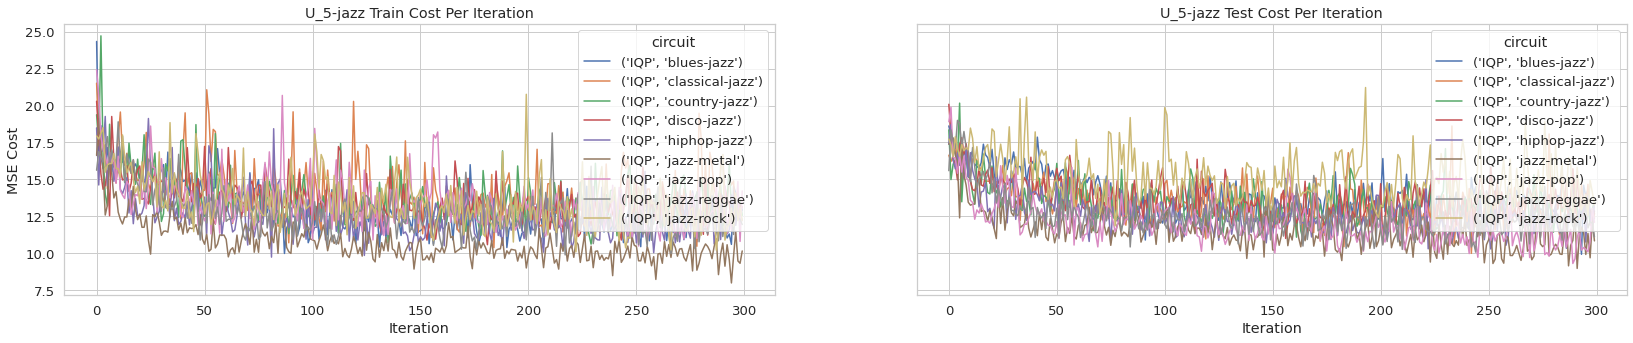

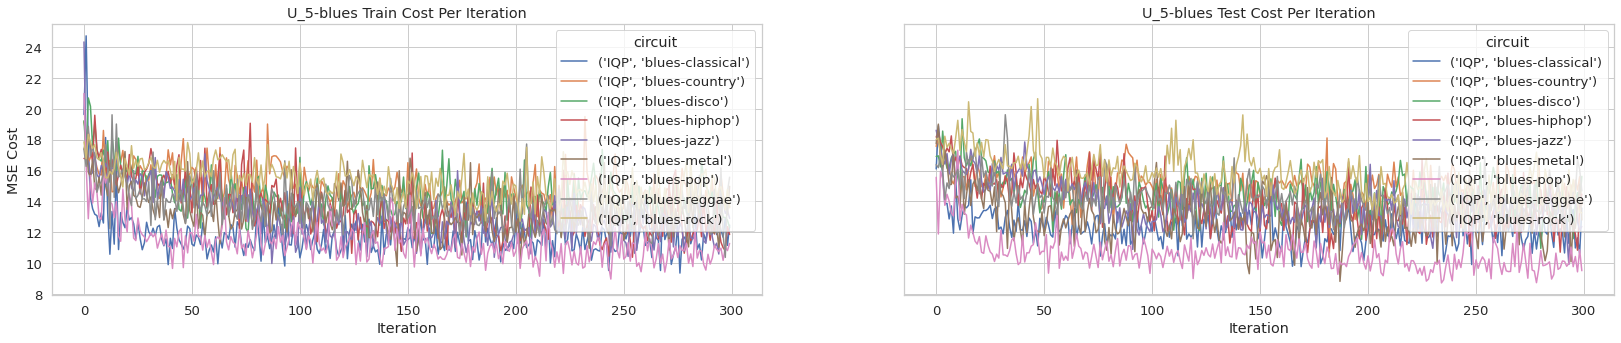

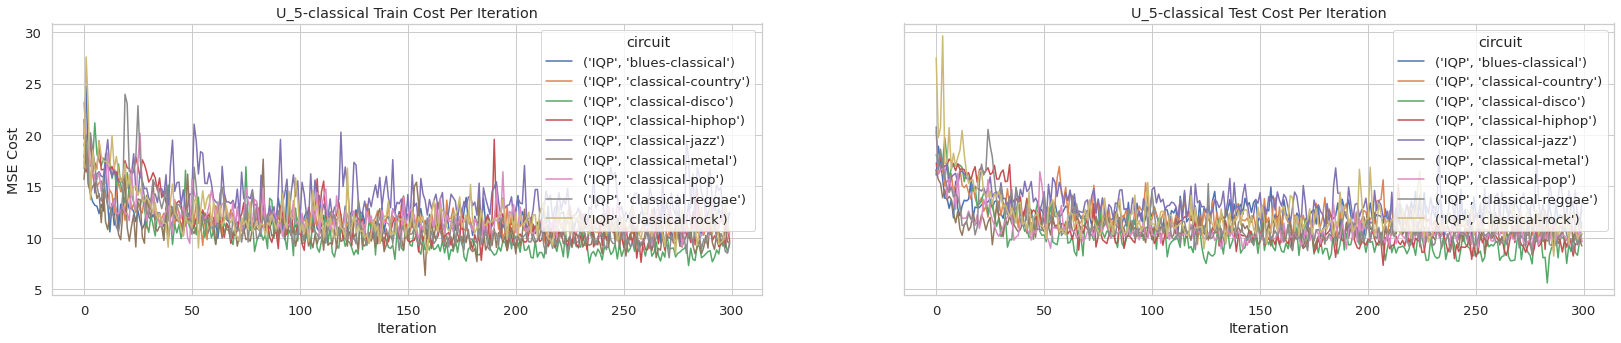

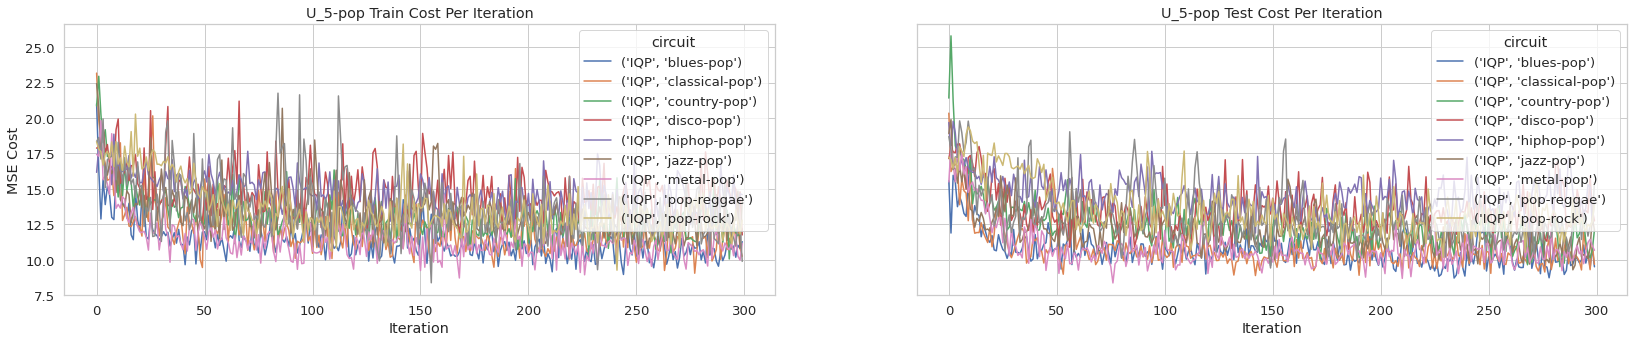

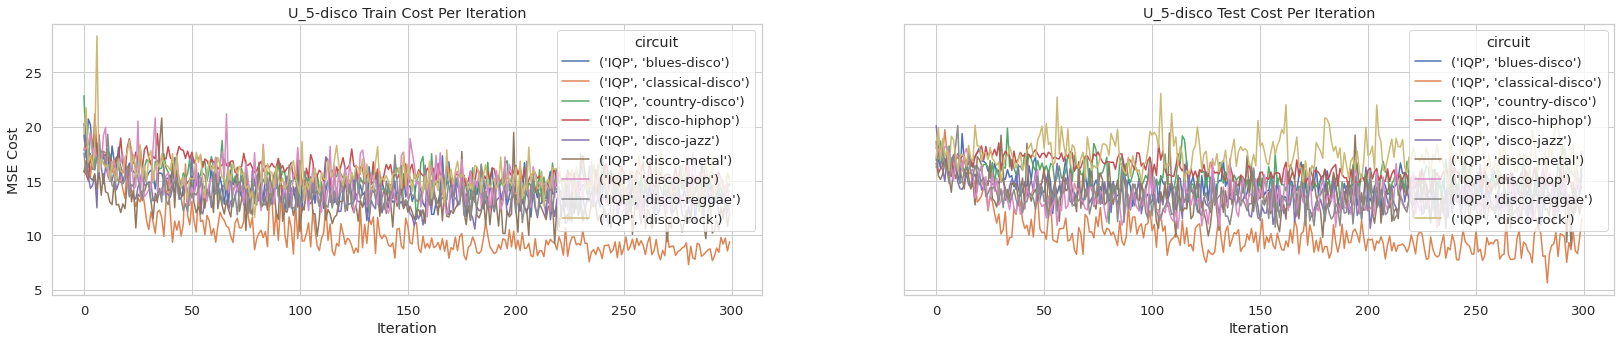

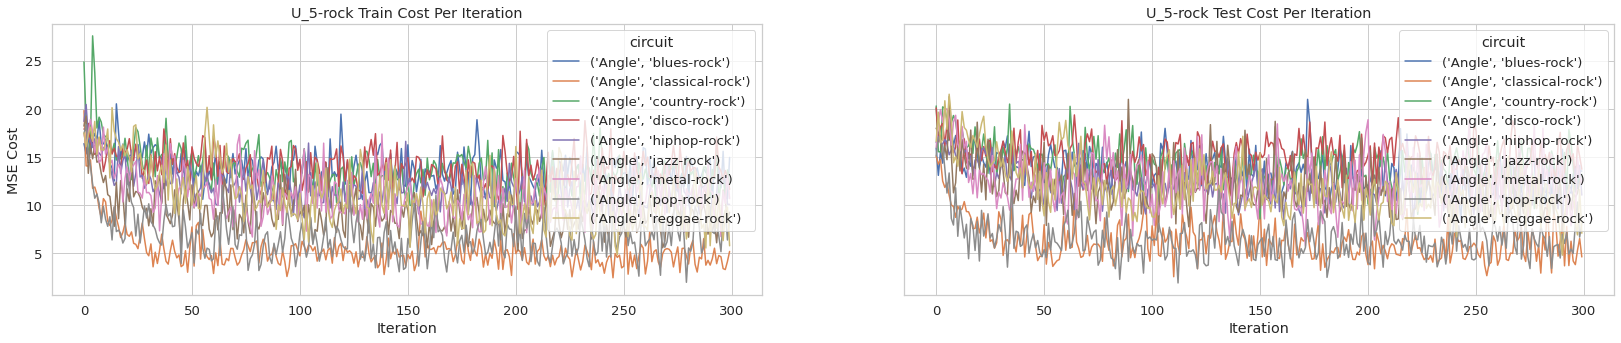

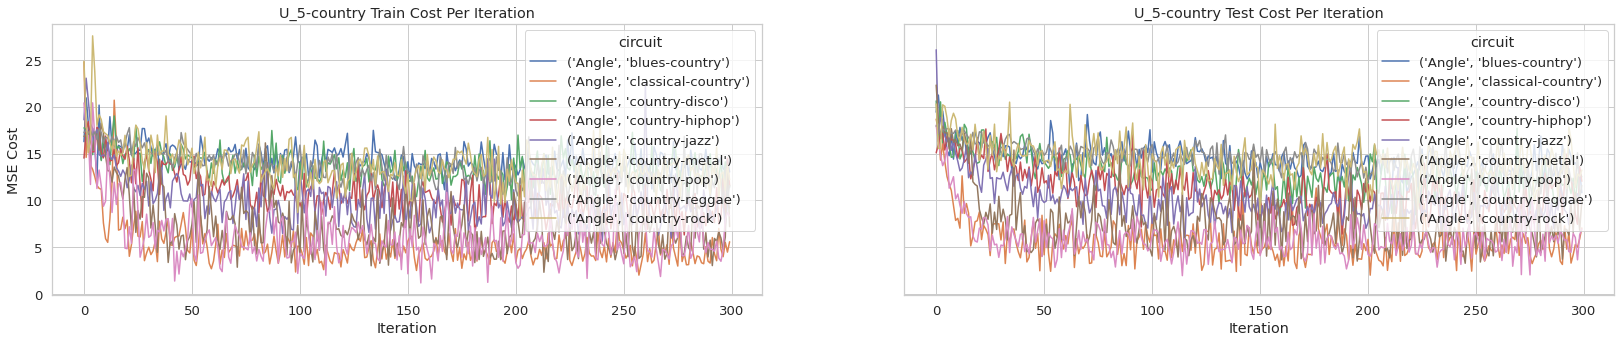

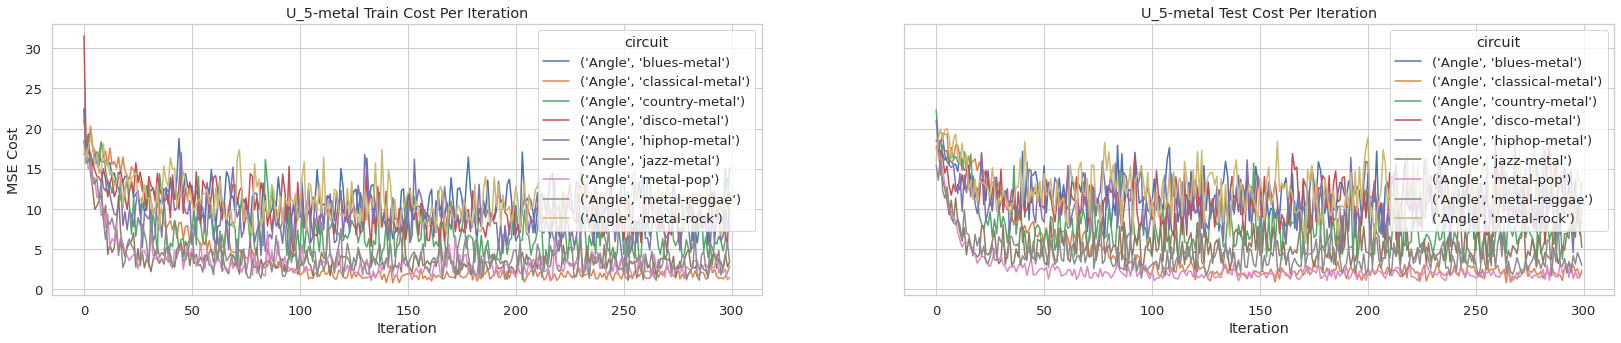

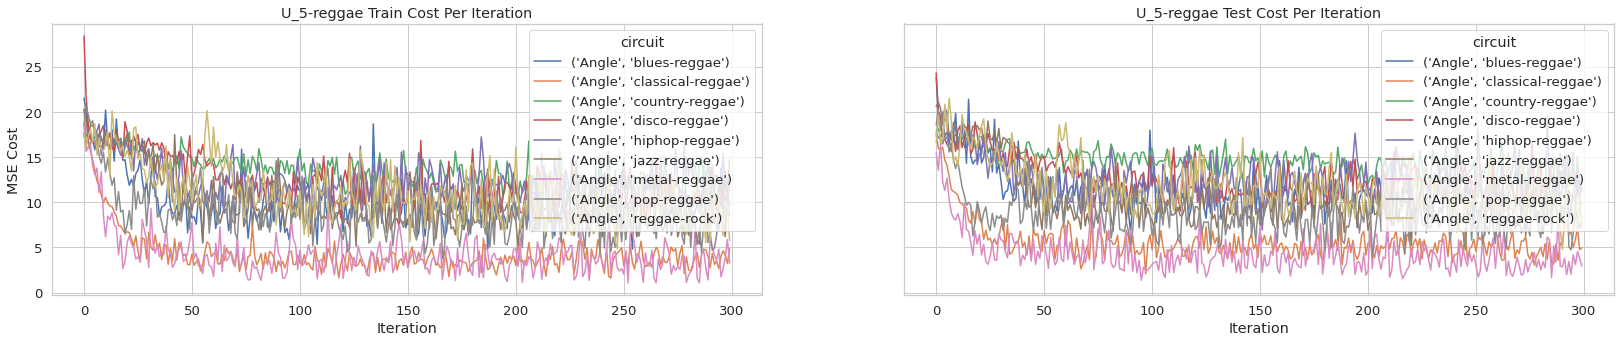

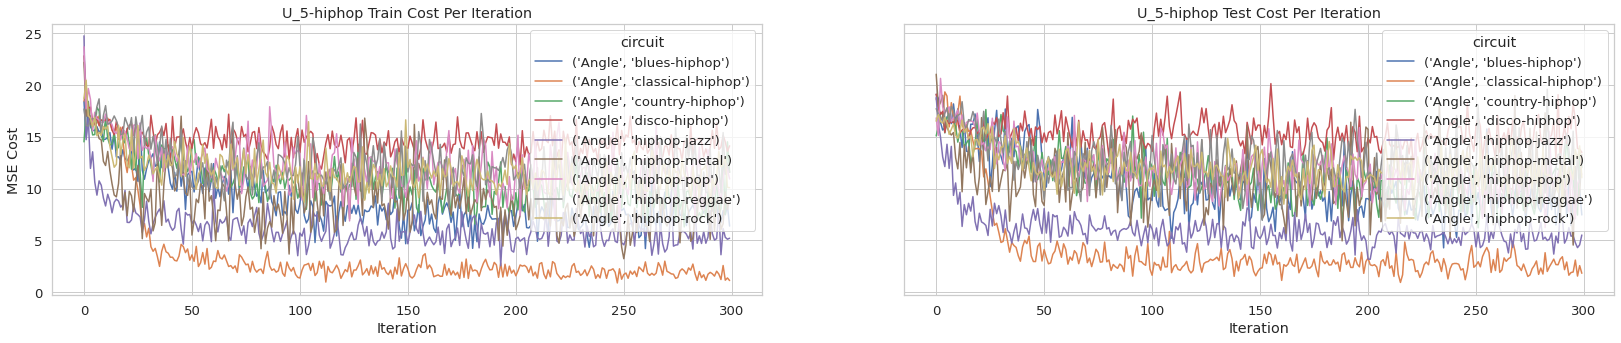

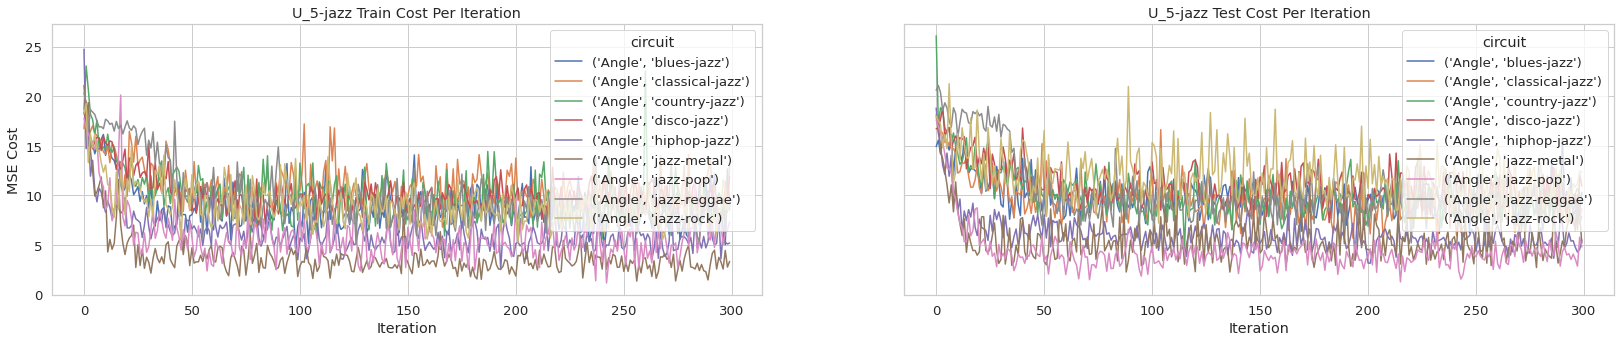

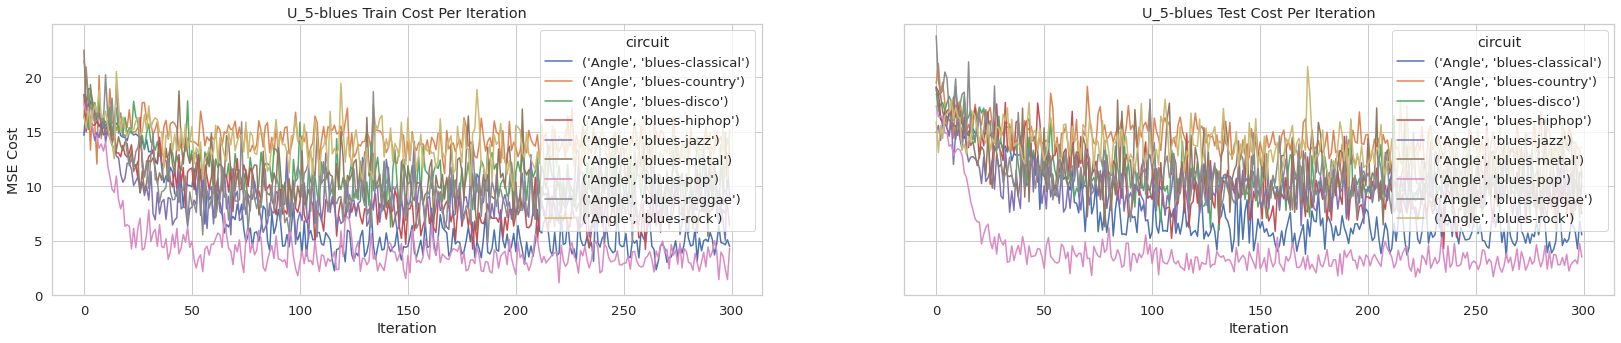

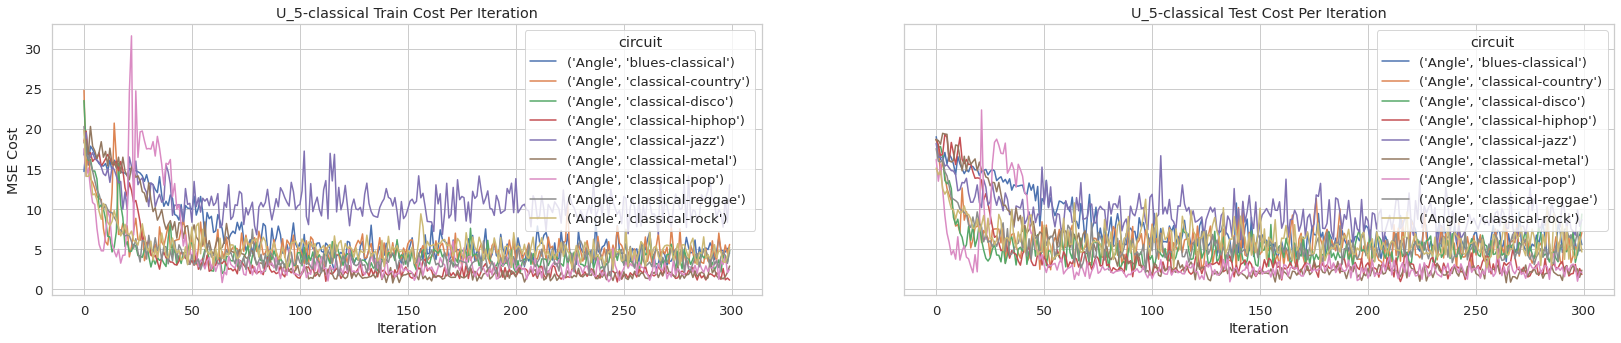

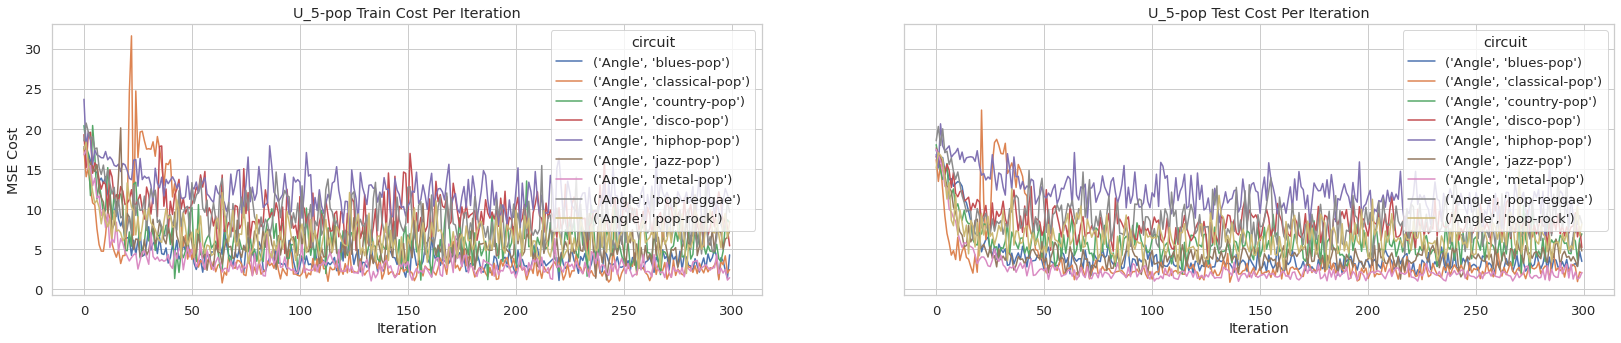

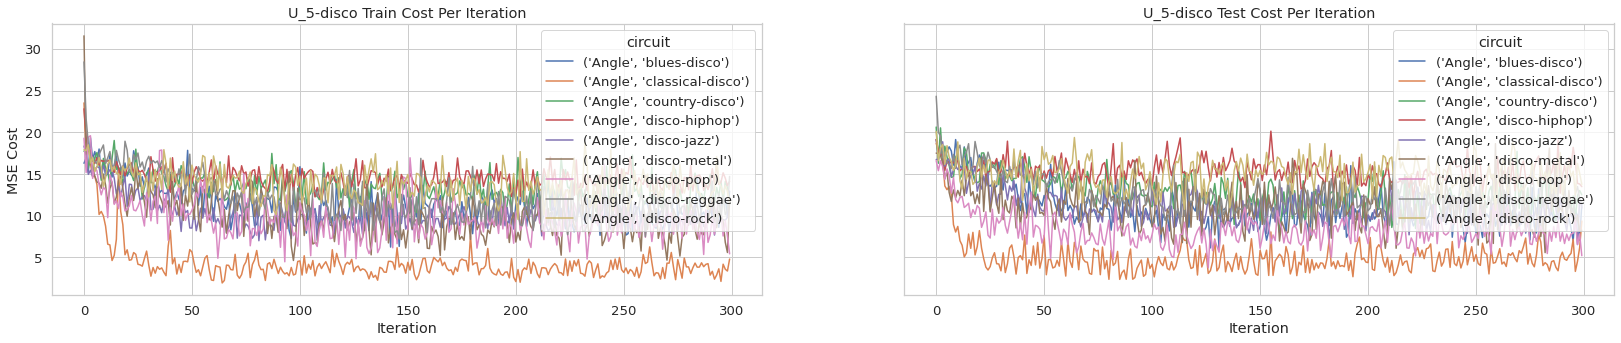

In [31]:
distinct_levels = list(
    {item for combo in experiment_info["data"]["target_pairs"] for item in combo}
)
distinct_embeddings = {embedding for embedding in experiment_info["preprocessing"]["embedding_list"]}

for embedding in distinct_embeddings:
    for level in distinct_levels:
        plot_loss(result_data.loc[result_data["embedding_option"]==embedding,:], ["circuit", "embedding_option", "target_levels"], [f"{level}"], figsize=(28, 5))